In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import training data

In [3]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


### Import test data

In [4]:
df_test = pd.read_csv('data/test.csv')
df_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_test.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

### Visualize the data - target feature and input features

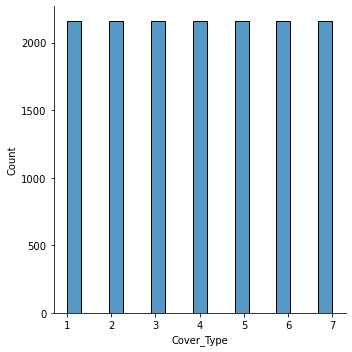

In [38]:
sns.displot(df_train["Cover_Type"])

#### Check for correlation between target and other features

In [39]:
df_train.corr()['Cover_Type']

Id                                    0.108363
Elevation                             0.016090
Aspect                                0.008015
Slope                                 0.087722
Horizontal_Distance_To_Hydrology     -0.010515
Vertical_Distance_To_Hydrology        0.075647
Horizontal_Distance_To_Roadways      -0.105662
Hillshade_9am                        -0.010286
Hillshade_Noon                       -0.098905
Hillshade_3pm                        -0.053399
Horizontal_Distance_To_Fire_Points   -0.089389
Wilderness_Area1                     -0.230117
Wilderness_Area2                      0.014994
Wilderness_Area3                      0.122146
Wilderness_Area4                      0.075774
Soil_Type1                            0.015069
Soil_Type2                            0.022627
Soil_Type3                           -0.016393
Soil_Type4                           -0.027816
Soil_Type5                            0.027692
Soil_Type6                            0.006521
Soil_Type7   

### Personal thoughts
After doing the basic checks and noting that the dataset has no null values, I also checked for the correlation of the target feature (Cover_Type) with other feautures. Nothing that most of the features are negatively corelated with the target and also that soil types 7 and 15 returns NaN because these columns have 0 as values althrough.

### Choice of algorithm - Random Forest
I settled for random forest because after running other algorithms, it performed better.

### Random forests

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
df_train = df_train.drop('Id', axis=1)
X = df_train.drop('Cover_Type',axis=1)
y = df_train['Cover_Type']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
rfc_pred = rfc.predict(X_test)

In [46]:
print(confusion_matrix(y_test,rfc_pred))

[[496  99   1   0  19   2  41]
 [122 434  13   0  45  20   4]
 [  0   6 534  33   5  66   0]
 [  0   0  11 623   0   9   0]
 [  1  19   7   0 619  10   0]
 [  0   5  71  13   6 564   0]
 [ 23   3   0   0   0   0 612]]


In [47]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.77      0.75      0.76       658
           2       0.77      0.68      0.72       638
           3       0.84      0.83      0.83       644
           4       0.93      0.97      0.95       643
           5       0.89      0.94      0.92       656
           6       0.84      0.86      0.85       659
           7       0.93      0.96      0.95       638

    accuracy                           0.86      4536
   macro avg       0.85      0.86      0.85      4536
weighted avg       0.85      0.86      0.85      4536



### Improving the performance
I want to run this analysis again droping the soil types 7 and 15.

In [48]:
df_train = df_train.drop(['Soil_Type7', 'Soil_Type15'], axis=1)

In [49]:
df_train.corr()['Cover_Type'].sort_values(ascending=False)

Cover_Type                            1.000000
Soil_Type38                           0.257810
Soil_Type39                           0.240384
Soil_Type40                           0.205851
Soil_Type10                           0.128972
Wilderness_Area3                      0.122146
Soil_Type35                           0.114327
Slope                                 0.087722
Wilderness_Area4                      0.075774
Vertical_Distance_To_Hydrology        0.075647
Soil_Type37                           0.071210
Soil_Type17                           0.042453
Soil_Type13                           0.040528
Soil_Type5                            0.027692
Soil_Type36                           0.025726
Soil_Type2                            0.022627
Soil_Type14                           0.022019
Elevation                             0.016090
Soil_Type1                            0.015069
Wilderness_Area2                      0.014994
Soil_Type11                           0.010228
Soil_Type16  

In [51]:
df_train = df_train.drop('Hillshade_9am', axis=1)

In [62]:
X = df_train.drop('Cover_Type',axis=1)
y = df_train['Cover_Type']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [70]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
rfc_pred = rfc.predict(X_test)

In [72]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.79      0.78      0.78       660
           2       0.79      0.70      0.74       668
           3       0.86      0.82      0.84       670
           4       0.93      0.97      0.95       630
           5       0.90      0.93      0.92       663
           6       0.82      0.88      0.85       608
           7       0.93      0.96      0.94       637

    accuracy                           0.86      4536
   macro avg       0.86      0.86      0.86      4536
weighted avg       0.86      0.86      0.86      4536



#### Using the test dataset provided to make predictions

In [73]:
df_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# I will drop the hillshade_9am, soil types 7 and 15 respectively
df_test = df_test.drop(['Hillshade_9am','Soil_Type7', 'Soil_Type15'], axis=1)

In [79]:
# I forgot drop the id
df_test = df_test.drop('Id', axis=1)

In [78]:
df_test.shape

(565892, 52)

In [80]:
rfc_pred = rfc.predict(df_test)

In [83]:
rfc_pred

array([2, 1, 1, ..., 3, 3, 3], dtype=int64)

### Pickle my model for future use and sharing

In [85]:
import pickle

In [86]:
pickle.dump(rfc, open('rfc_model.pkl','wb'))

### Loading my pickled model to confirm

In [87]:
model = pickle.load(open('rfc_model.pkl','rb'))

In [90]:
df_test.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,214,156,6645,1,...,0,0,0,0,0,0,0,0,0,0
1,2683,0,13,0,0,2654,216,152,6675,1,...,0,0,0,0,0,0,0,0,0,0
2,2713,16,15,0,0,2980,208,137,6344,1,...,0,0,0,0,0,0,0,0,0,0
3,2709,24,17,0,0,2950,201,125,6374,1,...,0,0,0,0,0,0,0,0,0,0
4,2706,29,19,0,0,2920,195,115,6404,1,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df_test.loc[0]

Elevation                             2680
Aspect                                 354
Slope                                   14
Horizontal_Distance_To_Hydrology         0
Vertical_Distance_To_Hydrology           0
Horizontal_Distance_To_Roadways       2684
Hillshade_Noon                         214
Hillshade_3pm                          156
Horizontal_Distance_To_Fire_Points    6645
Wilderness_Area1                         1
Wilderness_Area2                         0
Wilderness_Area3                         0
Wilderness_Area4                         0
Soil_Type1                               0
Soil_Type2                               0
Soil_Type3                               0
Soil_Type4                               0
Soil_Type5                               0
Soil_Type6                               0
Soil_Type8                               0
Soil_Type9                               0
Soil_Type10                              0
Soil_Type11                              0
Soil_Type12

In [103]:
print(model.predict(df_test.loc[40].to_numpy().reshape(1,-1)))

[2]


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
